Importa o modelo a ser fatiado e mapeado

In [2]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components.layer import Layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
choice = gui.ask_load_or_begin()
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        Layer.create_layers(folders, path_input, file_name, dpi, layer_height)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
criando as camadas
Total de [criando as camadas] : 0.25194263458251953
salvando as camadas
Total de [salvando as camadas] : 0.07463240623474121
Total de [Fase 0: ] : 0.3285238742828369


Paredes Finas

In [3]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        %reset_selective -f "c"
%reset_selective -f "camadas"
# TODO: arvore de paredes finas
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO: anotar todos os (não fechou contorno)
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Fase 1: Camada: 0
Criando paredes finas
OK: fechou contorno
OK: fechou contorno
OK: fechou contorno
OK: fechou contorno
salvando imagens das regiões
Total de [salvando imagens das regiões] : 1.4299113750457764
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.1969928741455078
Total de [Criando paredes finas] : 15.665294170379639
Total de [Fase 1: Camada: 0] : 15.708912372589111


Contornos

In [4]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[void_max,internal_max,external_max] = gui.ask_parameters_offsets()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 9
Total de [Criando Lvls] : 7.678469896316528
Criando os loops
Total de [Criando os loops] : 4.367670774459839
Criando regiões de influência
Total de [Criando regiões de influência] : 0.3387303352355957
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 2.7217905521392822
Retirando regiões da camada
['Lvl_000', 0, 0] Perdendo total:2382 maior void:0.33877038895859474Bw -> aceito
['Lvl_001', 0, 0] Perdendo total:1929 maior void:0.5872020075282308Bw -> aceito
['Lvl_002', 0, 0] Perdendo total:1636 maior void:0.5131744040150564Bw -> aceito
['Lvl_003', 0, 0] Perdendo total:1637 maior void:0.5131744040150564Bw -> aceito
['Lvl_004', 0, 0] Perdendo total:9505 maior void:5.503136762860728Bw -> bloqueado
['Lvl_000', 1, 0] Perdendo total:763 maior void:0.07779171894604768Bw -> aceito
['Lvl_001', 1, 0] Perdendo total:507 maior void:0.06524466750313676Bw -> aceito
['Lvl_002', 1, 0] Perdendo total:259 maior void:0.03387

Pontes

In [5]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[n_max, nozzle_diam_internal] = gui.ask_parameters_bridges()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        c.make_bridges(n_max, nozzle_diam_internal, folders)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c" 
%reset_selective -f "camadas"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 5.353938102722168
Criando pontes de Zigzag
Total de [Criando pontes de Zigzag] : 19.2775137424469
Criando pontes de Crossover
Elemento: ('Reg_000', 'Reg_001') Maior prioridade: 0
Total de [Criando pontes de Crossover] : 0.6197354793548584
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.024106264114379883
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.5295004844665527
Total de [Fase 3: Camada: 0] : 26.679430961608887


Zigzags

In [6]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 20.366780996322632
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.23290252685546875
Total de [Fase 4: Camada: 0] : 21.006295442581177


Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 1.1582541465759277


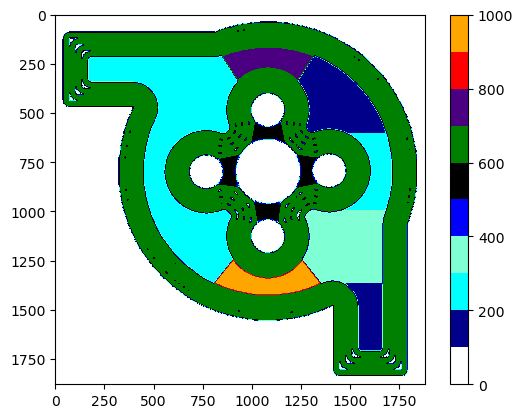

In [7]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

ROTAS

Rotas de Offset

In [8]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.12711787223815918
Total de [Making offset routes] : 6.583552598953247


Rotas de pontes

In [9]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making bridges routes"):
        c.make_bridges_routes(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making bridges routes


salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.33593082427978516
Total de [Making bridges routes] : 26.464169025421143


Rotas de Ziguezague

In [1]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making zigzag routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.5586011409759521
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.3417348861694336
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.12015390396118164
salvando grafos
Total de [salvando grafos] : 0.07714962959289551
Total de [Making zigzag routes] : 136.63170719146729


Weaving

In [2]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[internal_weaving] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(internal_weaving, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 33.496819257736206
salvando rotas
Total de [salvando rotas] : 0.09276914596557617
Total de [Fase 5 b] : 33.59133839607239


Rotas de Thin Walls

In [3]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5
Making thin walls routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.04930591583251953
Total de [Making thin walls routes] : 0.37242937088012695
Total de [Fase 5] : 0.3727750778198242


Unificando rotas EXTERNAS nas camadas

In [4]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 6"):
        c.close_routes_external(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"
    

Fase 6
Conectando rotas externas
Encontrando ponto de união ext-int
Total de [Encontrando ponto de união ext-int] : 1.1265203952789307
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 4.757379055023193
Conectando pontes de Crossover
salto:  [416, 2459]
salto:  [690, 456]
salto:  [485, 2250]
Total de [Conectando pontes de Crossover] : 9.391140460968018
Total de [Conectando rotas externas] : 16.643512964248657
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.5827236175537109
Total de [Fase 6] : 17.227118492126465


Unificando rotas INTERNAS nas camadas

In [5]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 7"):
        c.close_routes_internal(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 16.918819665908813
Conectando pontes de zigzag
salto:  [937, 1743]
salto:  [262, 1702]
Total de [Conectando pontes de zigzag] : 4.785645008087158
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.3971712589263916
Total de [Fase 7] : 23.896093368530273


Unindo rotas de thin walls

In [6]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 8"):
        c.close_routes_thinwalls(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 3.5010504722595215
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.03084254264831543
Total de [Fase 8] : 3.8448710441589355


Unindo todas as rotas e criando codigo G

In [1]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 9"):
        c.close_final_path(folders)
    with Timer("Cuspindo o Gcode"):
        path_tools.layers_to_Gcode(camadas, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

TypeError: expected string or bytes-like object, got 'NoneType'

In [ ]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Lista de imagens binárias (exemplo com arrays numpy)
# imagens = [
#     img_mapping,
#     img_mapping,
#     img_mapping
# ]

# # Lista de alturas no eixo z
# alturas = [0, 10, 20]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for img, z in zip(imagens, alturas):
#     x = np.linspace(0, img.shape[1], img.shape[1])
#     y = np.linspace(0, img.shape[0], img.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = np.full_like(x, z)
#     ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(img), shade=False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()


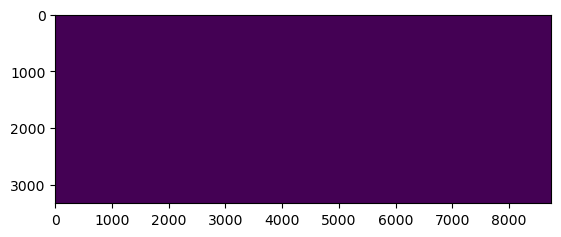

In [1]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

file_name = gui.find_saved_file(folders)
path_tools.layers_to_Gcode_FFF(camadas, folders, file_name)